In [51]:
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 7.6/7.6 MB 1.9 MB/s eta 0:00:00
     -------------------------------------- 163.0/163.0 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 1.6 MB/s eta 0:00:00
     -------------------------------------- 55.4/55.4 kB 960.7 kB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB 2.8 MB/s eta 0:00:00


In [52]:
(x_train,y_train),(x_test,y_test) = datasets.fashion_mnist.load_data()

In [53]:
x_train.shape

(60000, 28, 28)

In [54]:
x_test.shape

(10000, 28, 28)

In [55]:
x_train[0] #image size=28 * 28 same as the array size below (Sochlo)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [56]:
y_train[:5] #first 5 samples

array([9, 0, 0, 3, 0], dtype=uint8)

In [57]:
classes=["T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot"]

In [58]:
classes[9]

'Ankle boot'

In [59]:
def plot_sample(x,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

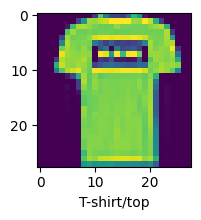

In [60]:
plot_sample(x_train,y_train,1)

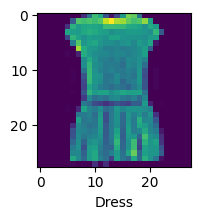

In [61]:
plot_sample(x_train,y_train,3)

In [62]:
x_train[0]/255 #  need to normalize

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [63]:
x_train = x_train / 255
x_test = x_test / 255

In [64]:
from tensorflow.keras import models
from tensorflow.keras import layers
input_shape=(28,28)
ann = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.6372 - accuracy: 0.7926
Epoch 2/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.4542 - accuracy: 0.8428
Epoch 3/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.4131 - accuracy: 0.8566
Epoch 4/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.3866 - accuracy: 0.8663
Epoch 5/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.3674 - accuracy: 0.8715


In [65]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.3921 - accuracy: 0.8625


[0.3920677602291107, 0.862500011920929]

In [66]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test,y_pred_classes))

313/313 [==============================] - 3s 8ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.86      0.82      1000
           1       0.98      0.96      0.97      1000
           2       0.75      0.79      0.77      1000
           3       0.83      0.89      0.86      1000
           4       0.74      0.82      0.78      1000
           5       0.95      0.95      0.95      1000
           6       0.77      0.51      0.62      1000
           7       0.93      0.92      0.93      1000
           8       0.94      0.96      0.95      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [67]:
#Now using CNN

In [72]:
cnn = models.Sequential([
    # cnn(refer diagram)
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),# kernel_size is filter size i.e. filter dimentions
    layers.MaxPooling2D((2,2)),
    
    #Not mandatory to have one more layer still going by the architecture
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),# kernel_size is filter size i.e. filter dimentions
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [75]:
cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [76]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.4328 - accuracy: 0.8416
Epoch 2/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2903 - accuracy: 0.8930
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2482 - accuracy: 0.9070
Epoch 4/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2143 - accuracy: 0.9193
Epoch 5/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1852 - accuracy: 0.9306
Epoch 6/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1612 - accuracy: 0.9385
Epoch 7/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1372 - accuracy: 0.9478
Epoch 8/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1148 - accuracy: 0.9563
Epoch 9/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0992 - accuracy: 0.9625
Epoch 10/10
1875/1875 [==============================] - 51s 27m

In [77]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.3123 - accuracy: 0.9106


[0.31232672929763794, 0.9106000065803528]

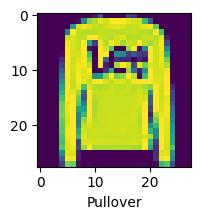

In [78]:
plot_sample(x_test,y_test,1)

In [79]:
y_pred=cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 2s 7ms/step


array([[6.4274051e-11, 2.9674124e-11, 8.5956714e-14, 7.1565401e-12,
        1.4230479e-10, 1.3817147e-09, 4.0710005e-11, 1.4348213e-07,
        1.6187621e-13, 9.9999988e-01],
       [7.4955965e-06, 8.6815992e-11, 9.9996221e-01, 5.4388716e-11,
        2.9180343e-05, 1.1685990e-12, 1.1160714e-06, 1.0534199e-12,
        6.3567995e-09, 2.2853277e-12],
       [6.9068854e-21, 1.0000000e+00, 1.0786446e-25, 1.9111605e-19,
        6.2353852e-26, 4.4412032e-29, 4.6951206e-23, 6.2165435e-36,
        1.0760905e-21, 2.0055876e-32],
       [3.7329326e-26, 1.0000000e+00, 3.0477906e-32, 1.7119770e-27,
        2.4069153e-29, 0.0000000e+00, 7.9854688e-26, 0.0000000e+00,
        1.2715319e-31, 0.0000000e+00],
       [5.5682259e-03, 1.6960922e-10, 1.3580521e-04, 4.7156021e-08,
        8.8407687e-06, 7.1409310e-08, 9.9428695e-01, 3.8203993e-08,
        1.4586132e-10, 2.8623838e-08]], dtype=float32)

In [81]:
y_classes= [np.argmax(element) for element in y_pred]
y_classes[:5]

[9, 2, 1, 1, 6]

In [82]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

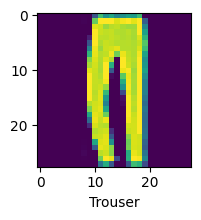

In [86]:
plot_sample(x_test,y_test,2)

In [87]:
classes[y_classes[2]] #Correct

'Trouser'

In [88]:
print("Classification Report: \n", classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.89      0.82      0.85      1000
           3       0.90      0.94      0.92      1000
           4       0.84      0.88      0.86      1000
           5       0.99      0.98      0.98      1000
           6       0.75      0.73      0.74      1000
           7       0.93      0.99      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.99      0.94      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

